# Understanding the model...

This notebook holds my workings out, as I try to understand James Annan's recent blogs

### The original code from @thomasallanhouse's webpage

In [1]:
# Pull in libraries needed
%matplotlib inline
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

In [2]:
# Represent the basic dynamics
def odefun(t,x,beta0,betat,t0,t1,sigma,gamma):
    dx = np.zeros(6)
    if ((t>=t0) and (t<=t1)):
        beta = betat
    else:
        beta = beta0
    dx[0] = -beta*x[0]*(x[3] + x[4])
    dx[1] = beta*x[0]*(x[3] + x[4]) - sigma*x[1]
    dx[2] = sigma*x[1] - sigma*x[2]
    dx[3] = sigma*x[2] - gamma*x[3]
    dx[4] = gamma*x[3] - gamma*x[4]
    dx[5] = gamma*x[4]
    return dx

In [14]:
# Parameters of the model
N = 6.7e7 # Total population
i0 = 1e-4 # Proportion of the population infected on day 0
tlast = 365.0 # Consider a year
latent_period = 5.0 # Days between being infected and becoming infectious
infectious_period = 7.0 # Days infectious
R0 = 2.5 # Basic reproduction number in the absence of interventions
Rt = 0.75 # Reproduction number in the presence of interventions
tend = 21.0 # Number of days of interventions

In [15]:
beta0 = R0 / infectious_period
betat = Rt / infectious_period
sigma = 2.0 / latent_period
gamma = 2.0 / infectious_period

t0ran = np.array([-100, 40, 52.5, 65])

def mylab(t):
    if t>0:
        return "Start at " + str(t) + " days"
    else:
        return "Baseline"

sol=[]
for tt in range(0,len(t0ran)):
    sol.append(integrate.solve_ivp(lambda t,x: odefun(t,x,beta0,betat,t0ran[tt],t0ran[tt]+tend,sigma,gamma),
                              (0.0,tlast),
                              np.array([1.0-2.0*i0, 0.0, 0.0, i0, i0, 0.0]),
                              'RK45',
                              atol=1e-8,
                              rtol=1e-9))
    
sol

[  message: 'The solver successfully reached the end of the integration interval.'
      nfev: 914
      njev: 0
       nlu: 0
       sol: None
    status: 0
   success: True
         t: array([0.00000000e+00, 7.47967916e-02, 8.22764708e-01, 1.83998284e+00,
        2.93032495e+00, 4.14809841e+00, 5.51806271e+00, 7.07031441e+00,
        8.83056934e+00, 1.08395394e+01, 1.31827867e+01, 1.59866378e+01,
        1.93526558e+01, 2.32261461e+01, 2.66520088e+01, 3.00778714e+01,
        3.29509593e+01, 3.58467432e+01, 3.82624272e+01, 4.07149886e+01,
        4.27723718e+01, 4.48649198e+01, 4.66503377e+01, 4.84626526e+01,
        5.00401220e+01, 5.16367752e+01, 5.30524804e+01, 5.44817781e+01,
        5.59110759e+01, 5.71356758e+01, 5.83737731e+01, 5.96118704e+01,
        6.07056395e+01, 6.18079418e+01, 6.29102440e+01, 6.40125463e+01,
        6.49813495e+01, 6.59571510e+01, 6.69329525e+01, 6.79087539e+01,
        6.88845554e+01, 6.97585469e+01, 7.06373587e+01, 7.15161706e+01,
        7.23949825e+01

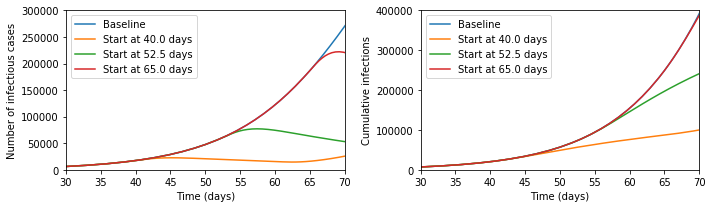

In [16]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
for tt in range(0,len(t0ran)):
    plt.plot(sol[tt].t,3e6*(sol[tt].y[3] + sol[tt].y[4]).T, label=mylab(t0ran[tt]))
plt.xlim([30,70])
plt.ylim([0,3e5])
plt.xlabel('Time (days)')
plt.ylabel('Number of infectious cases')
plt.legend()
plt.subplot(1,2,2)
for tt in range(0,len(t0ran)):
    plt.plot(sol[tt].t,3e6*sol[tt].y[5].T, label=mylab(t0ran[tt]))
plt.xlabel('Time (days)')
plt.ylabel('Cumulative infections')
plt.legend()
plt.xlim([30,70])
plt.ylim([0,4e5])
plt.tight_layout()
plt.show()

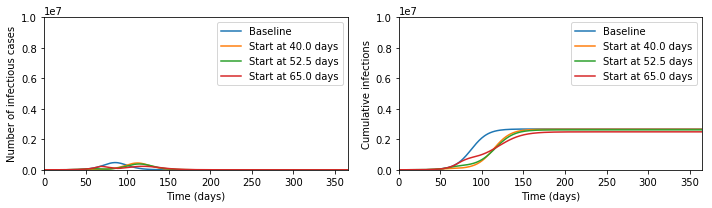

In [17]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
for tt in range(0,len(t0ran)):
    plt.plot(sol[tt].t,3e6*(sol[tt].y[3] + sol[tt].y[4]).T, label=mylab(t0ran[tt]))
plt.xlim([0,tlast])
plt.ylim([0,1e7])
plt.xlabel('Time (days)')
plt.ylabel('Number of infectious cases')
plt.legend()
plt.subplot(1,2,2)
for tt in range(0,len(t0ran)):
    plt.plot(sol[tt].t,3e6*sol[tt].y[5].T, label=mylab(t0ran[tt]))
plt.xlabel('Time (days)')
plt.ylabel('Cumulative infections')
plt.legend()
plt.xlim([0,tlast])
plt.ylim([0,1e7])
plt.tight_layout()
plt.show()

*OK. So this code doesn't quite replicate the figures on his webpage, in the order of magnitude (I've already changed the ylim in the figure above). But it's pretty close in shape at least.*

